# Data Auditing 

<div style=" color:black; text-shadow: 1px 1px brown; font-size:2em;  background:url(style/images/Lucerne3.jpg)">,
    <h1 align="center">Scientific Python
    <img src="style/images/kundalini_pythons_gold_outline.png" style="height:360px; align:center; " ></h1>
    </div>


## 1. Data cleansing process:

Data cleansing is an iterative process. The first step of the cleansing process is data auditing. In this step, we identify the types of anomalies that reduce the data quality.  Data auditing is about programmatically checking the data using some validation rules that are pre-specified, and then creating a report of the quality of the data and its problems. We often apply some statistical tests in this step for examining the data.
Data Anomalies can be classified at a high level into three categories:

1. **Syntactic Anomalies**: 
describe characteristics concerning the format and values used for representation of the entities. Syntactic anomalies such as: lexical errors, domain format errors, syntactical error and irregularities.
2. **Semantic Anomalies**: 
hinder the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: Integrity constraint violations, contradictions, duplicates and invalid tuples
3. **Coverage Anomalies**: 
decrease the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorized as: missing values and missing tuples

We give examples in this part of the auditing process that is applied to discover different anomalies in data.
***


## Wrangling Titanic Data

The Titanic data is the data set provided in the Kaggle competition "Titanic: Machine Learning from Disaster". The competition has been available from 28 Sep 2012 with more than 4000 teams joining the competition. 

"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy". For more details, please refer to "https://www.kaggle.com/c/titanic" 

The focus here is not the analysis of the data. Instead, we will concentrate on the identification of errors in the data, which might cause problems in the analysis. This data set contains the following variables
* <font color="blue">survival</font>: a boolean variable indicates whether the passenger survived or not.
* <font color="blue">pclass</font>: Passenger's Carbin Class 
* <font color="blue">sex</font>: the gender of a passenger
* <font color="blue">age</font>: Age
* <font color="blue">sibsp</font>: Number of Siblings/Spouses Aboard 
* <font color="blue">parch</font>: Number of Parents/Children Aboard 
* <font color="blue">fare</font>: Passenger ticket Fare
* <font color="blue">embarked</font>: abbreviation of Port of Embarkation
* <font color="blue">class</font>: the passenger's carbin class
* <font color="blue">who</font>: a variable takes values in {man, woman, child}
* <font color="blue">adult_male</font>: a boolean variable
* <font color="blue">deck</font>: the deck
* <font color="blue">embark_town</font>: the name of the port of embarkation 
* <font color="blue">alive</font>: whether or not the passenger was alive
* <font color="blue">alone</font>: a boolean variable indicates if the passenger traveled alone.
* <font color="blue">name</font>: Name of the passenger

For convenience, we will use the demo version of Titanic data included in the seaborne library: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv. For the purpose of demonstration,
some errors have been introduced in the data.
Notice that this task was developed based on the materials provided in the Kaggle website. 

In [2]:
#Basic scientific python libs
import pandas as pd
#import numpy as np
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### First, load the data using Pandas library 

As we discussed in the lecture, the first thing you should do is to inpect the file and figure out the file format. It is not hard to see that the titanic data is store in a csv file. So we can use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">read_csv()</a> function.

In [3]:
titanic = pd.read_csv("titanic_new.csv")

Now, the data has been loaded and stored in a Panda DataFrame. We can take an overview of the data. For example, you might need to know 
* the number of columns, i.e., attributes, and what are the attributes?
* the number of rows, i.e., passengers
* what is the data type of each attributes?
and etc.

We start by looking at the dimensionality of the data and a few lines of the data.

In [4]:
print (titanic.shape) 
titanic.head(10)

(892, 16)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"Braund, Mr. Owen Harris"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"Heikkinen, Miss. Laina"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"Allen, Mr. William Henry"
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,"Moran, Mr. James"
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"McCarthy, Mr. Timothy J"
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,"Palsson, Master. Gosta Leonard"
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,"Nasser, Mrs. Nicholas (Adele Achem)"


You can also print out the last couple of rows with the <font color="blue">tail()</font> function. We've got a sense of the variables, their class type, and the first few observations of each by observing the data. We know we're working with 892 observations of 15 variables. 

Next, we have a look at some key information about each variable to answer the following questions
* **Which features are categorical?** These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? 
    * Categorical variables:<font color="blue">survived</font>, <font color="blue">sex</font>, <font color="blue">embarked</font>, <font color="blue">who</font>, <font color="blue">embark_town</font>, <font color="blue">alive</font>, <font color="blue">alone</font>, and <font color="blue">name</font>, <font color="blue">deck</font>
    * Ordinal variables: <font color="blue">pclass</font>, <font color="blue">class</font>, 
* **Which features are numerical**? Which features are numerical? Within numerical features are the values discrete, continuous, or time-series based?
    * Continuous: <font color="blue">age</font>, <font color="blue">fare</font>. 
    * Discrete: <font color="blue">sibsp</font>, <font color="blue">parch</font>.

Answering these questions will help us select the appropriate methods(e.g., plots) to audit the data.

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 16 columns):
survived       892 non-null int64
pclass         892 non-null int64
sex            892 non-null object
age            715 non-null float64
sibsp          892 non-null int64
parch          892 non-null int64
fare           892 non-null float64
embarked       890 non-null object
class          892 non-null object
who            892 non-null object
adult_male     892 non-null bool
deck           204 non-null object
embark_town    890 non-null object
alive          892 non-null object
alone          892 non-null bool
name           892 non-null object
dtypes: bool(2), float64(2), int64(4), object(8)
memory usage: 99.4+ KB


What is the distribution of the numerical values across the samples? This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,0.384529,2.307175,29.720517,0.522422,0.381166,32.201737
std,0.486757,0.836750,14.490914,1.102264,0.805706,49.665589
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.750000,0.000000,0.000000,7.917700
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


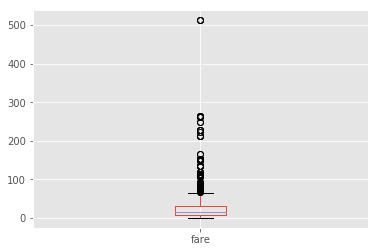

In [12]:
titanic.fare.plot(kind='box')

The observation tells us that 
* Total samples are 892 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers paying as high as $512, and as low as 0.0.
* Few elderly passengers within age range 65-80.
* The minimum age is 0.42.
* Some missing values exist in the "age" column

Again, what is the distribution of the categorical variables?

In [13]:
titanic.describe(include=['O'])

,sex,embarked,class,who,deck,embark_town,alive,name
count,892,890,892,892,204,890,892,892
unique,4,3,3,3,7,7,2,891
top,male,S,Third,man,C,Southampton,no,"Behr, Mr. Karl Howell"
freq,574,644,491,538,60,643,550,2


What the table above tells us:
* Names are not unique across the dataset (count !=unique), "Behr, Mr. Karl Howell" appears twice.
* Sex variable as four possible values with 574 males, which is suspicious. 
* Embarked takes three possible values. In contrast, the embark_town takes 7 different values. However, if the two values represent the same information, it becomes suspicious.
* Alive is a boolean variable
* There are a lot of missing values in deck, and 2 in both <font color="blue">embarked</font> and <font color="blue">embark_town</font>.

It is clear that the summary statistics on the distributions of each variable gives us a lot of information about the variable. Before we continue our auditing process, we are could further split the "name" column into more meaningful columns for better analysis. 

In [14]:
# Lets seperate the titles from the name 
coltitle = titanic['name'].apply(lambda s: pd.Series({'title': s.split(',')[1].split('.')[0].strip(),
                            'lastName':s.split(',')[0].strip(), 'firstName':s.split(',')[1].split('.')[1].strip()}))
# Add the columns to the titanic dataframe
titanic = pd.concat([titanic, coltitle], axis=1) 
#Drop the Name column, but here we choose to keep it at the moment.
#titanic.drop('name', axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,firstName,lastName,title
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"Braund, Mr. Owen Harris",Owen Harris,Braund,Mr
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"Cumings, Mrs. John Bradley (Florence Briggs Th...",John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"Heikkinen, Miss. Laina",Laina,Heikkinen,Miss
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Jacques Heath (Lily May Peel),Futrelle,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"Allen, Mr. William Henry",William Henry,Allen,Mr


Notice that we kept the "name" column for now, as we might need to check where we have correctly split it into three columns.

### Identify Syntactical Anomalies 
In this section, we will demonstrate how to audit the data to identify some syntactical errors. 

#### Are all the titles consistent?

Let's start with checking the <font color="blue">title</font> column, as we just extract it from the <font color="blue">name</font> column. We used the <font color="orange">split()</font> function together with the following delimiters: "," and "." Is it possible that the split method we used gave us some erroneous extraction? 

In [15]:
titanic.title.value_counts()

Mr              518
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Mme               1
Ms                1
Sir               1
Lady              1
Capt              1
Don               1
Jonkheer          1
the Countess      1
Name: title, dtype: int64

We have got 17 different titles. We might ask if it is possible to have 17 different titles, as those often used are Mr, Mrs, Miss, Ms, and Dr. What is the meaning of the following title?
* Rev 
* Mlle
* Jonkheer
* Don
* Mme
* The countess

Is it possible that the patten we used to extract Title is not applicable to all the records?

In this case, we might need to have a look at the rows whose title is equal to the tiles listed above. For example, we look at "Rev".

In [10]:
titanic[titanic.title == "Rev"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,firstName,lastName,title
149,0,2,male,42.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,"Byles, Rev. Thomas Roussel Davids",Thomas Roussel Davids,Byles,Rev
150,0,2,male,51.0,0,0,12.525,S,Second,man,True,NaN,Southampton,no,True,"Bateman, Rev. Robert James",Robert James,Bateman,Rev
249,0,2,male,54.0,1,0,26.000,S,Second,man,True,NaN,Southampton,no,False,"Carter, Rev. Ernest Courtenay",Ernest Courtenay,Carter,Rev
626,0,2,male,57.0,0,0,12.350,Q,Second,man,True,NaN,Queenstown,no,True,"Kirkland, Rev. Charles Leonard",Charles Leonard,Kirkland,Rev
848,0,2,male,28.0,0,1,33.000,S,Second,man,True,NaN,Southampton,no,False,"Harper, Rev. John",John,Harper,Rev
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,"Montvila, Rev. Juozas",Juozas,Montvila,Rev


The are six rows in the DataFrame that contain "Rev". It seams that "Rev" is not a random lexical error, instead it might be a valid title that is not use often nowadays. We can check if "Rev" is a title by searching it online. What we will get from Wikipedia is
> The Reverend is an honorific style most often placed before the names of Christian clergy and ministers. There are sometimes differences in the way the style is used in different countries and church traditions

We can confirm that Rev is a title that is not often used nowadays. Similarly, you can check the other titles as well. It is interesting that "The countess" and "Mlle" are titles for female and "Don" for male. Should we unify these titles? For instance, assume that we are going to unify the title values by replacing "The countess", "Lady", "Mme" and "Mlle" with "Miss" and "Don" with "Mr", what should we do?

In [16]:
titanic.title.replace({'Mlle':'Miss', 'the Countess':'Miss', 'Lady':'Miss', 'Mme':'Miss', 'Don':'Mr'},inplace=True)

Now, we can drop the <font color="blue">name</font> column.

In [17]:
titanic.drop(['name'], axis=1, inplace=True)

#### Are there any lexical errors in the data?
Typos are the most common error, particularly whenever the data collection process involves human. While we were collecting the data, we might mis-type the name of the embark_town. It is always a good idea to check the categorical variables to make sure their values are spelled without errors. Let's look at the <font color="blue">embark_town</font>. You can also use the <font color="blue">value_counts()</font> function or the <font color="blue">unique()</font> function.

In [18]:
titanic.embark_town.value_counts()

Southampton    643
Cherbourg      167
Queenstown      75
queenstown       2
Cherborg         1
Cherbourge       1
Southamtpon      1
Name: embark_town, dtype: int64

The output above show that 
* typos 
    * Cherbourg v.s. Cherborg
    * Southampton v.s. Southamtpon
    * Cherbourg v.s. Cherbourge
* Inconsistent spelling:
 * Queenstown v.s. queenstown

The assumption we made here is that it is less likely that the spelling with large counts is wrong. You can also check  <font color="blue">embark_town</font> against <font color="blue">embarked</font>.

In [19]:
titanic.embark_town.replace({"Cherborg": "Cherbourg", "Cherbourge": "Cherbourg", "Southamtpon":"Southampton", "queenstown":"Queenstown"}, inplace=True)

The cross-tabulation of <font color="blue">embark_town</font> and <font color="blue">embarked</font> below proves the correspondence between the values of <font color="blue">embark_town</font> and those of <font color="blue">embarked</font>.

In [20]:
pd.crosstab(titanic["embark_town"], titanic["embarked"])

embarked,C,Q,S
embark_town,,,
Cherbourg,168,1,0
Queenstown,0,77,0
Southampton,0,0,644


#### Further more, are their any other inconsistent spellings?
Here, we are going to use the <font color="blue">sex</font> variable as an example. The observation told us that it is a boolean variable that takes two values, i.e., <font color="blue">male</font> and <font color="blue">female</font> with lower case letters. Let's check is unique values in the <font color="blue">sex</font> column.

In [21]:
titanic.sex.unique()

array(['male', 'female', 'M', 'F'], dtype=object)

The output shows the number of unique values in "sex" is 4, which is supposed to be 2. The inconsistency here is obvious. We can either replace male/female with M/F or M/F with male/female. 

In [22]:
titanic['sex'].replace({'F':'female', 'M':'male'},inplace=True)

You can check all the other categorical variables in a similar way.


### Semantic errors: 
Variables can be correlated with each other. One variable might provide information that we can use to validate another variable.  In this task, we will check where nor not the data
* violate the integrity constraints
* contradictions
* duplication

We firstly check the integrity constraints. Given the variable description, one can figure out that "age", "who" 
and "adult_male" are correlated. For example, **if we assume all the children should under 18, and both men and women should be 18 or above**,
* Were all children's ages under 18? 
* Were the ages of all men and women greater than or equal to 18?

To answer the questions, we need to compute the summary statistics individually for passengers marked as child, man and woman. One way is to use the <font color="blue">describe()</font> function together with the <font color="blue">groupby()</font> function.

In [18]:
titanic['age'].groupby(titanic['who']).describe()

,count,mean,std,min,25%,50%,75%,max
who,,,,,,,,
child,83.0,6.598434,5.151912,0.42,2.0,5.0,10.0,25.0
man,414.0,33.155797,12.896093,16.00,23.0,30.0,40.0,80.0
woman,218.0,32.000000,11.495441,16.00,23.0,30.0,39.0,63.0


The statistics shows that there are 83 children, 413 men and 218 women. 

In [23]:
titanic[((titanic.who == "man") | (titanic.who == "woman")) & (titanic.age < 18)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False,Erna Alexandra,Andersson,Miss
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False,Lillian Amy,Goodwin,Miss
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True,Bertha,Ilett,Miss
86,0,3,male,16.0,1,3,34.3750,S,Third,man,True,NaN,Southampton,no,False,William Neal,Ford,Mr
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True,Malake,Attalah,Miss
138,0,3,male,16.0,0,0,9.2167,S,Third,man,True,NaN,Southampton,no,True,Olaf Elon,Osen,Mr
156,1,3,female,16.0,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True,"Katherine ""Katie""",Gilnagh,Miss
163,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True,Jovo,Calic,Mr
208,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,"Helen ""Ellen""",Carr,Miss
220,1,3,male,16.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,yes,True,Victor Francis,Sunderland,Mr


There are 30 passenger should be classified as man and woman respectively. Now we can replace the value of <font color="blue">who</font> for the above record to "child", given the assumption we made.

In [24]:
titanic.loc[((titanic.who == "man") | (titanic.who == "woman")) & (titanic.age < 18), "who"] = "child"

Instead of using the <font color="orange">describe()</font> function, you can also choose to use plot. For example,

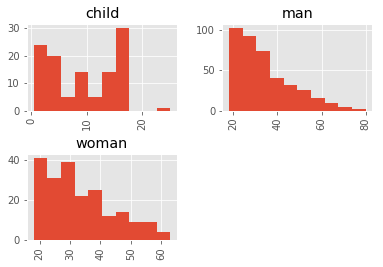

In [27]:
titanic.hist(by="who", column="age");

There are still one error in the <font color="blue">child</font> group. We have one child, whose age is 25.

In [28]:
titanic[(titanic.age == 25) & (titanic.who=='child')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title
813,0,3,female,25.0,4,2,31.275,S,Third,child,False,NaN,Southampton,no,False,Ebba Iris Alfrida,Andersson,Miss


In this case, we have to use the value of <font color="blue">sex</font> to figure out the value of <font color="blue">who</font>. 

In [30]:
titanic.loc[(titanic.age == 25) & (titanic.who=='child'), 'who'] = "woman"
titanic.loc[813,]

survived                       0
pclass                         3
sex                       female
age                           25
sibsp                          4
parch                          2
fare                      31.275
embarked                       S
class                      Third
who                        woman
adult_male                 False
deck                         NaN
embark_town          Southampton
alive                         no
alone                      False
firstName      Ebba Iris Alfrida
lastName               Andersson
title                       Miss
Name: 813, dtype: object

Now, let's compute a simple cross-tabulation of two factors, i.e., <font color="blue">sex</font> and <font color="blue">who</font>:

In [31]:
pd.crosstab(titanic["who"],titanic["sex"])

sex,female,male
who,,
child,54,58
man,0,520
woman,260,0


The tabulation shows that all the women have gender "female" and all the men have gender "male".

#### Are the values of "adult_male" consistent with the values of "sex" and "who"?

Now, let's look at <font color="blue">adult_male</font>, the value of which should "True" if a passenger is male and adult, "False" if a passenger is female or a male child. In other words, we need to check the consistency among three variables. What should we do? 

In [32]:
titanic[(titanic.adult_male) & ((titanic.sex != "male") | (titanic.who != "man"))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title
86,0,3,male,16.0,1,3,34.3750,S,Third,child,True,NaN,Southampton,no,False,William Neal,Ford,Mr
138,0,3,male,16.0,0,0,9.2167,S,Third,child,True,NaN,Southampton,no,True,Olaf Elon,Osen,Mr
163,0,3,male,17.0,0,0,8.6625,S,Third,child,True,NaN,Southampton,no,True,Jovo,Calic,Mr
220,1,3,male,16.0,0,0,8.0500,S,Third,child,True,NaN,Southampton,yes,True,Victor Francis,Sunderland,Mr
266,0,3,male,16.0,4,1,39.6875,S,Third,child,True,NaN,Southampton,no,False,Ernesti Arvid,Panula,Mr
282,0,3,male,16.0,0,0,9.5000,S,Third,child,True,NaN,Southampton,no,True,Alfons,de Pelsmaeker,Mr
333,0,3,male,16.0,2,0,18.0000,S,Third,child,True,NaN,Southampton,no,False,Leo Edmondus,Vander Planke,Mr
433,0,3,male,17.0,0,0,7.1250,S,Third,child,True,NaN,Southampton,no,True,Nikolai Erland,Kallio,Mr
500,0,3,male,17.0,0,0,8.6625,S,Third,child,True,NaN,Southampton,no,True,Petar,Calic,Mr
532,0,3,male,17.0,1,1,7.2292,C,Third,child,True,NaN,Cherbourg,no,False,Joseph Jr,Elias,Mr


In [33]:
titanic[(titanic.adult_male == False) & ((titanic.sex == "male") & (titanic.age > 18))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title


According to our assumption on the age of children, we need to change the value of <font color="blue">adult_male</font> form True to False. 

In [34]:
titanic.loc[(titanic.adult_male) & ((titanic.sex != "male") | (titanic.who != "man")), "adult_male"]=False

Now, another question is if it is possible for a child less than 10-years old to be on-board the ship alone. Let's have a look

In [28]:
titanic[(titanic.age < 10) & (titanic.alone)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title
777,1,3,female,5.0,0,0,12.475,S,Third,child,False,NaN,Southampton,yes,True,Virginia Ethel,Emanuel,Miss


The output shows that there was a 5-years old girl who was on-board and survived. Should we change the value of <font color="blue">alone</font>? The value is consistent with the value of <font color="blue">silbsp</font> and that of <font color="blue">parch</font>. In this case, we might choose to keep it as it is.

#### Are there any duplicated records?
If we assume that <font color="blue">firstName</font>, <font color="blue">lastName</font> and <font color="blue">age</font> can uniquely identify a passenger, we can then use the three values to check whether or not the dataset contains duplicated records.

In [35]:
titanic[titanic.duplicated(["firstName", "lastName", "age"], keep=False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True,Karl Howell,Behr,Mr
891,1,1,male,26.0,0,0,30.0,Q,First,man,True,C,Cherbourg,no,False,Karl Howell,Behr,Mr


The output above shows that there are two duplicated records. If you carefully check the two records, the second one contains inconsistent values. For example, <font color="blue">survived</font> = 1, but <font color="blue">alive</font> = no, and <font color="blue">embarked</font> = C, but <font color="blue">embard_town</font> = Cherbourg. Taking into account these two observations, we can choose to remove the second record and just keep the first one.

In [36]:
titanic[titanic.duplicated(["firstName", "lastName", "age"], keep="first")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,firstName,lastName,title
891,1,1,male,26.0,0,0,30.0,Q,First,man,True,C,Cherbourg,no,False,Karl Howell,Behr,Mr


In [38]:
titanic.drop_duplicates(["firstName", "lastName", "age"], keep='first', inplace=True)

## Summary
In this tutorial we demonstrate how to identify and correct some syntactic and semantic data errors. We will cover missing values and outliers separately in the following two weeks' tutorial.